In [0]:
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [3]:
# Enter the ID of the Google Drive folder containing train.csv and test.csv files.
# The ID of the folder is the long string of numbers and letters in the URL of the folder in Google Drive.

file_list = drive.ListFile({'q': "'1hTn4X7it_yhfr_jx6GWe35vVE7S2iO5n' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))

title: Mnist.ipynb, id: 1bpxsJFFz0H5askD22GTo14y-hy_BLc-e
title: train.csv, id: 1-XxfAJzMuxJIKz2B0cqOPy94VqAwzSoq
title: test.csv, id: 1UtBDkAHWXRQBSmccRrmhH2jlQqB4LKPJ


In [0]:
# Enter the ID of train.csv and test.csv. The IDs are printed in the output of the cell above.
train_downloaded = drive.CreateFile({'id': '1-XxfAJzMuxJIKz2B0cqOPy94VqAwzSoq'})
train_downloaded.GetContentFile('train.csv')
test_downloaded = drive.CreateFile({'id': '1UtBDkAHWXRQBSmccRrmhH2jlQqB4LKPJ'})
test_downloaded.GetContentFile('test.csv')

In [5]:
# See the top rows of the train.csv file
!ls
!head train.csv
!head test.csv

adc.json  sample_data  test.csv  train.csv
label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117

In [0]:
import pandas as pd

# Load train.csv into pandas dataframe and print the summary
df = pd.read_csv('train.csv')
df1 = pd.read_csv('test.csv')


In [7]:
print ("Train data shape:", train.shape)
print ("Test data shape:", test.shape)

NameError: ignored

In [8]:
num_training = 30000

labels_df = df.iloc[:num_training,0]
eval_labels_df = df.iloc[num_training:,0]
labels_df1 = df1.iloc[:,0]

features_df = df.iloc[:num_training,1:]
eval_features_df = df.iloc[num_training:,1:]
features_df1 = df1.iloc[:,:]

features_df[features_df > 0] = 1
eval_features_df[eval_features_df > 0] = 1
features_df1[features_df1 > 0] = 1

labels = labels_df.values
eval_labels = eval_labels_df.values
labels1 = labels_df1.values

print labels
print labels1

#print labels_df[0]

#print labels_df
print features_df
print features_df1

[1 0 1 ... 2 3 0]
[0 0 0 ... 0 0 0]
       pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
5           0       0       0       0       0       0       0       0       0   
6           0       0       0       0       0       0       0       0       0   
7           0       0       0       0       0       0       0       0       0   
8           0       0       0       0       0       0       0       0       0   
9           0       0       0       0       0       0       0       0       0   
10          0       0       0       0       0       0       0       0    

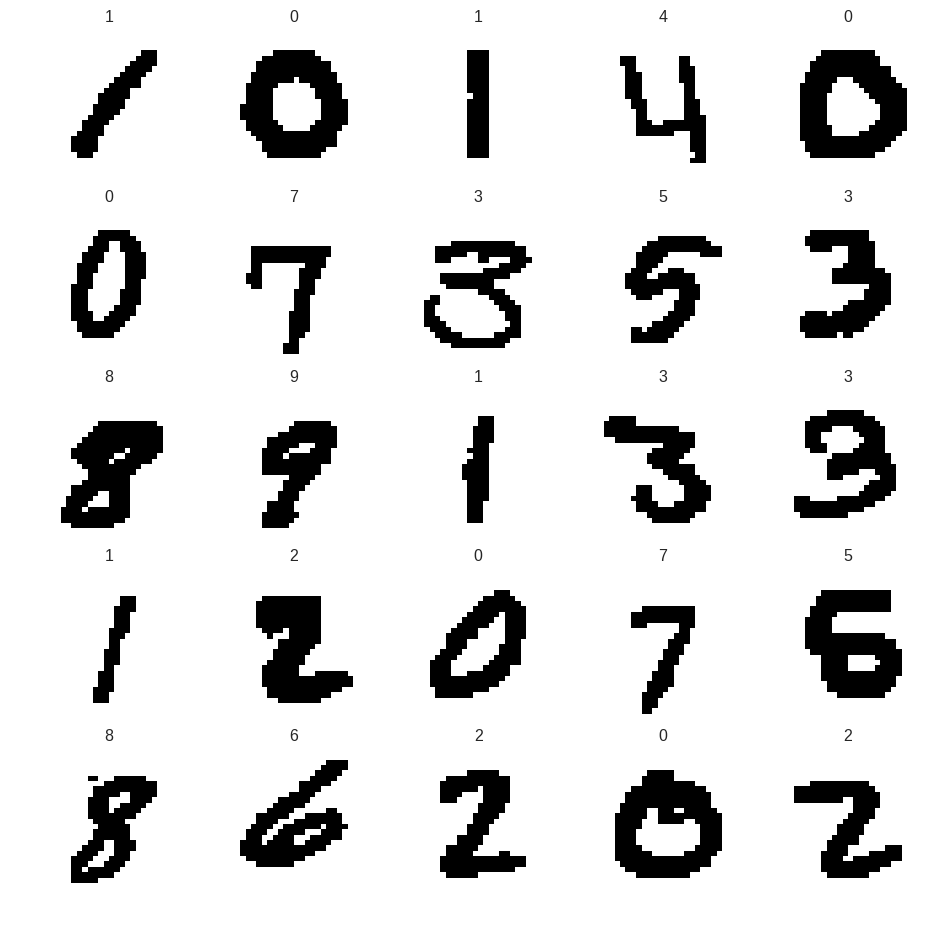

In [9]:
import matplotlib.pyplot as plt, matplotlib.image as mpimg
import time

#%matplotlib inline

my_dpi=96
plt.figure(figsize=(1200/my_dpi, 1200/my_dpi), dpi=my_dpi)

for i in range(25):
  img = features_df.iloc[i].as_matrix().reshape((28,28))
  #plt.figure(i)
  plt.subplot(5, 5, i+1)
  plt.imshow(img, cmap='binary')
  plt.title(labels[i])
  plt.axis('off')
  #time.sleep(1)

In [10]:
import tensorflow as tf

headers = list(df)
headers1 = list(df1)
#print "headers: ", len(headers)
feature_names = headers[1:]
feature_names1 = headers1[1:]
#labels = headers[0]
#print 'feature columns: ', len(feature_names)
#print 'label column: ', labels

#first_row = df.iloc[0].values
#print "first row: label = ", first_row[0]
#print "first row: values = ", len(first_row[1:])

#value_t = tf.reshape(tf.convert_to_tensor(first_row[1:]), [28, 28])
#print value_t

print len(labels), labels
print len(feature_names), feature_names

30000 [1 0 1 ... 2 3 0]
784 ['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59', 'pixel60', 'pixel61', 'pixel62', 'pixel63', 'pixel64', 'pixel65', 'pixel66', 'pixel67', 'pixel68', 'pixel69', 'pixel70', 'pixel71', 'pixel72', 'pixel73', 'pixel74', 'pixel75', 'pixel76', 'pixel77', 'pixel78', 'pixel79', 'pixel80', 'pixel81', 'pixel82', 'pixel83', 'pixel84', 'pixel85', 'pixel86', 'pixel87', 'pixel88', 'p

In [11]:
!mkdir model_dir

# Create a DNNClassifier with real-valued feature columns
# (the number of columns = number of pixels in an image)
features = [tf.contrib.layers.real_valued_column(f) for f in feature_names]  # tf.feature_column.numeric_column(f) for f in range(28*28)]
#feature_columns = [tf.feature_column.numeric_column("x", shape=[28, 28])]

classifier = tf.estimator.DNNClassifier(feature_columns=features,
                                        hidden_units=[64,32,16],
                                        n_classes=10,
                                        model_dir='model_dir')


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_global_id_in_cluster': 0, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fb247f08150>, '_model_dir': 'model_dir', '_protocol': None, '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_device_fn': None, '_experimental_distribute': None, '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_evaluation_master': '', '_eval_distribute': None, '_train_distribute': None, '_master': ''}


In [0]:


# Define the function that returns a batch of training examples every time it's called
#def get_training_input():
  #x = {str(f) : tf.constant(df[f].values, shape=[df[f].size,1], dtype=tf.int32) for f in feature_names}
  #y = tf.constant(df[labels].values, shape=[df[labels].size], dtype=tf.int32)
  #x = {str(f) : tf.constant(df.sample(n=batch_size)[f].values, shape=[batch_size,1], dtype=tf.int32) for f in feature_names}
  #y = tf.constant(df.sample(n=batch_size)[labels].values, shape=[batch_size], dtype=tf.int32)
  #return x, y
  
#get_training_input()
#  x = {str(f): tf.constant(df[f].values, shape=[df[f].size,1], dtype=tf.float32) for f in feature_names}
#  y = tf.constant(df[self.LOOKBACK].values, shape=[df[self.LOOKBACK].size], dtype=tf.float32)
    
  
#train_input_fn = tf.estimator.inputs.numpy_input_fn(
#    x_list
#    x = {f : tf.constant(df[f].values, shape=[df[f].size,1]) for f in feature_names},
#    y = tf.constant(df[labels].values, shape=[df[labels].size,1]),
#    num_epochs = None,
#    batch_size = 100,
#    shuffle=True
#)

#batch_size = 100

# https://www.tensorflow.org/get_started/datasets_quickstart
# features: A {'feature_name':array} dictionary (or DataFrame) containing the raw input features.
# labels : An array containing the label for each example.
# batch_size : An integer indicating the desired batch size.
#def train_input_fn():
#    """An input function for training"""
#    # Convert the inputs to a Dataset.
#    dataset = tf.data.Dataset.from_tensor_slices((dict(features_df), labels))
#
#    # Shuffle, repeat, and batch the examples.
#    dataset = dataset.shuffle(1000).repeat().batch(batch_size)
#
#    # Return the dataset.
#    return dataset

#train_input_fn()



#train_input_fn()

In [12]:
!rm model_dir/*

rm: cannot remove 'model_dir/*': No such file or directory


In [13]:
batch_size = 1000

for i in range(100):
  dataset = None
  def train_input_fn():
    global dataset
    if not dataset:
      dataset = tf.data.Dataset.from_tensor_slices((dict(features_df), labels))
      dataset = dataset.shuffle(batch_size).repeat().batch(batch_size)
      print "creating dataset"
    print "returning dataset"
    return dataset

  eval_dataset = None
  eval_dataset1 = None
  def eval_input_fn():
    global eval_dataset
    if not eval_dataset:
      eval_dataset = tf.data.Dataset.from_tensor_slices((dict(features_df), labels))
      eval_dataset = eval_dataset.shuffle(batch_size).repeat().batch(batch_size)
    return eval_dataset

  classifier.train(input_fn=train_input_fn, steps=100)
  evaluation = classifier.evaluate(input_fn=eval_input_fn, steps=1)
  #evaluation1 = classifier.evaluate(input_fn=eval_input_fn1, steps=1)
  num_training_steps = evaluation.get('global_step', '?')
  loss = evaluation.get('loss', '?')

  print 'evaluation: ', evaluation
  #print 'evaluation on test:', evaluation1
  print 'num_training_steps: ', num_training_steps
  print 'loss: ', loss

creating dataset
returning dataset
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into model_dir/model.ckpt.
INFO:tensorflow:loss = 2322.8835, step = 0
INFO:tensorflow:Saving checkpoints for 100 into model_dir/model.ckpt.
INFO:tensorflow:Loss for final step: 475.8936.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-11-18-15:26:57
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model_dir/model.ckpt-100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-11-18-15:27:09
INFO:tensorflow:Saving dict for global step 100: accuracy = 0.884, average_loss = 0.41734

KeyboardInterrupt: ignored

In [0]:
!ls
!tar -cvf model_dir.tar model_dir
!ls

In [0]:
#!ls -l model_dir.tar
#!gzip model_dir.tar
!ls -l model_dir.tar.gz


-rw-r--r-- 1 root root 273618354 Apr  5 12:13 model_dir.tar.gz


In [0]:
def eval_input_fn1():
  eval_dataset1 = tf.data.Dataset.from_tensor_slices((dict(features_df1)))
  #eval_dataset1 = eval_dataset1.shuffle(batch_size).repeat().batch(batch_size)
  eval_dataset1 = eval_dataset1.batch(len(features_df1))
  return eval_dataset1

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model_dir/model.ckpt-400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


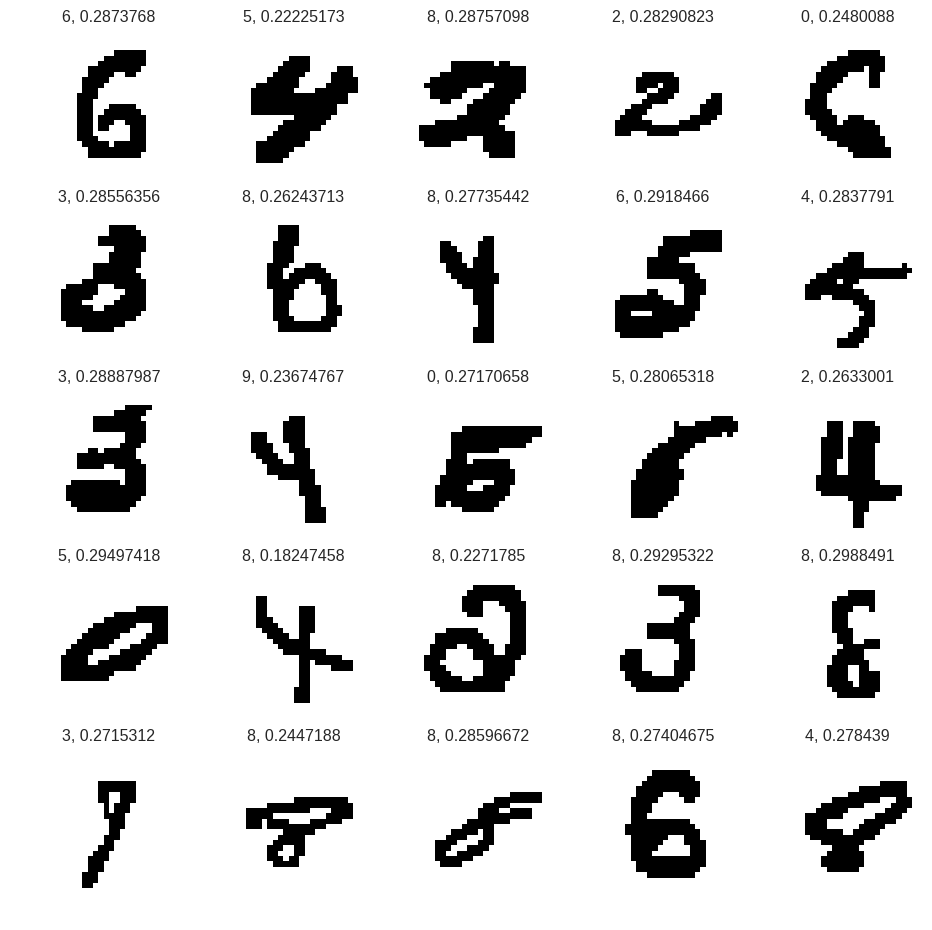

In [15]:
import matplotlib.pyplot as plt, matplotlib.image as mpimg
import time

#%matplotlib inline

my_dpi=96
plt.figure(figsize=(1200/my_dpi, 1200/my_dpi), dpi=my_dpi)

predictions = classifier.predict(
    input_fn=eval_input_fn1)

counter = 0
counter1 = 0

for pred_dict in predictions:
  counter1 += 1
  #print pred_dict
  class_id = pred_dict['class_ids'][0]
  probability = pred_dict['probabilities'][class_id]
  if probability < .30:
    counter += 1
    img = features_df1.iloc[counter1 - 1].as_matrix().reshape((28,28))
    #plt.figure(i)
    if counter <= 25:
      plt.subplot(5, 5, counter)
      plt.imshow(img, cmap='binary')
      plt.title(str(class_id) + ', ' + str(probability))
      plt.axis('off')
      #time.sleep(1)
    else:
      break
